# K2tranpix Mag Limit

In [2]:
%run '/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/K2tranpix_maglim.py'
%run '/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/Injections/KasenKilonovaSeed.ipynb'
%run '/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/Injections/K2MagLimit.ipynb'
%run '/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/Injections/KSN2015K Injector.ipynb'
%matplotlib notebook
from tqdm import tnrange, tqdm_notebook
from random import randint

In [ ]:
K2MagLimit('/Volumes/TOSHIBA EXt/K2/c06/212200000/72000/ktwo212272599-c06_lpd-targ.fits.gz')

In [ ]:
hdu = fits.open('/Volumes/TOSHIBA EXt/K2/c06/212200000/72000/ktwo212272599-c06_lpd-targ.fits.gz')
dat = hdu[1].data
data = fits.ImageHDU(hdu[1].data.field('FLUX')[:]).data#np.copy(testdata)#
for i in tqdm_notebook(range(50)):
    Start = randint(0,data.shape[0]-1)
    file = '/Volumes/TOSHIBA EXt/K2/c06/212200000/72000/ktwo212272599-c06_lpd-targ.fits.gz'
    K2MagLimitTime(file,Start)

HBox(children=(IntProgress(value=0, max=50), HTML(value='')))

In [ ]:
Start = 1118
K2MagLimitDuration('/Volumes/TOSHIBA EXt/K2/c06/212200000/95000/ktwo212295159-c06_lpd-targ.fits.gz',Start)

In [ ]:
a = np.load('/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/Injections/MagLim/c06/212200000/72000/ktwo212272599.npy')
a[a==0] = np.nan
plt.figure()
plt.imshow(a,origin='lower')
plt.colorbar();

In [ ]:
%run '/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/K2tranpix_maglim.py'
%run '/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/Injections/KasenKilonovaSeed.ipynb'
%matplotlib notebook
from random import randint
import os

def K2MagLimit(file):

    path = '/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/Injections/MagLim/'


    Mag = np.arange(19,20,0.5) # distance in Mpc
    
    pixfile = file
    hdu = fits.open(pixfile)
    dat = hdu[1].data
    data = fits.ImageHDU(hdu[1].data.field('FLUX')[:]).data#np.copy(testdata)#
    time = dat["TIME"] + 2454833.0
    Qual = hdu[1].data.field('QUALITY')

    funny_keywords = {'1CTYP4': 'CTYPE1',
                      '2CTYP4': 'CTYPE2',
                      '1CRPX4': 'CRPIX1',
                      '2CRPX4': 'CRPIX2',
                      '1CRVL4': 'CRVAL1',
                      '2CRVL4': 'CRVAL2',
                      '1CUNI4': 'CUNIT1',
                      '2CUNI4': 'CUNIT2',
                      '1CDLT4': 'CDELT1',
                      '2CDLT4': 'CDELT2',
                      '11PC4': 'PC1_1',
                      '12PC4': 'PC1_2',
                      '21PC4': 'PC2_1',
                      '22PC4': 'PC2_2'}
    mywcs = {}
    for oldkey, newkey in funny_keywords.items():
        mywcs[newkey] = hdu[1].header[oldkey]
    wcs = WCS(mywcs)


    Detections = np.zeros((len(Mag),data.shape[1],data.shape[2]))
    Limit = np.zeros((data.shape[1],data.shape[2]))
    # arrays to initialise multiple concurrent tests
    x = [np.arange(0,data.shape[1],2),np.arange(1,data.shape[1],2)]
    y = [np.arange(0,data.shape[2],2),np.arange(1,data.shape[2],2)]

    for k in range(len(Mag)):

        for i in range(data.shape[1]):
            for j in range(data.shape[2]):
                #X, Y = np.meshgrid(x[i],y[j],indexing='ij')
                X = i
                Y = j
                Start = 1000#randint(0,data.shape[0]-1)
                Seed = K2Kilonova(-1,Mag[k],time,Start)
                testdata = np.copy(data)
                testdata[Start:,X,Y] += Seed[Start:]
                detec = K2tranPix(testdata,time,Qual,wcs,X,Y,Start)

                if (detec == 1).any:
                    Detections[k,np.where(detec == 1)[0],np.where(detec == 1)[1]] += 1
        plt.figure()
        plt.imshow(Detections[k],origin = 'lower')
    for i in range(data.shape[1]):
        for j in range(data.shape[2]):
            Index = np.where(Detections[:,i,j] == 1)[0]
            if len(Index) > 0:
                Limit[i,j] = Mag[Index[-1]]

    save = path+file.split('K2/')[-1].split('-')[0]
    
    try:
        
        if not os.path.exists(path+file.split('K2/')[-1]):
            os.makedirs(path+file.split('K2/')[-1].split('ktwo')[0])
        np.savez(save,Limit)
    except FileExistsError:
        np.savez(save,Limit)
        
    np.save(save,Limit)
    return



In [ ]:
K2MagLimit('/Volumes/TOSHIBA EXt/K2/c06/212200000/72000/ktwo212272599-c06_lpd-targ.fits.gz')

In [ ]:
a = np.load('/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/Injections/MagLim/c06/212200000/72000/ktwo212272599.npy')
plt.figure()
plt.imshow(a,origin='lower')
plt.colorbar();

# Looking at variation in limiting magnitude for time start

In [ ]:
path = '/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/Injections/MagLim/TimeTest/Kilonova/'
Files = np.asarray(glob(path+'*.npy'))

In [ ]:
Thing = []
for f in Files:
    Thing.append(np.load(f))
Thing = np.array(Thing)

In [ ]:
M = np.nanmean(Thing,axis=(0))
S = np.nanstd(Thing,axis=(0))

In [ ]:
plt.figure()
plt.imshow(M,origin='lower')
plt.colorbar()
plt.figure()
plt.imshow(S,origin='lower')
plt.colorbar();

In [3]:
path = '/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/Injections/MagLim/TimeTest/KSN2015K/'
Files = np.asarray(glob(path+'*.npy'))
KSN = []
for f in Files:
    KSN.append(np.load(f))
KSN = np.array(KSN)

KM = np.nanmean(KSN,axis=(0))
KS = np.nanstd(KSN,axis=(0))

<IPython.core.display.Javascript object>


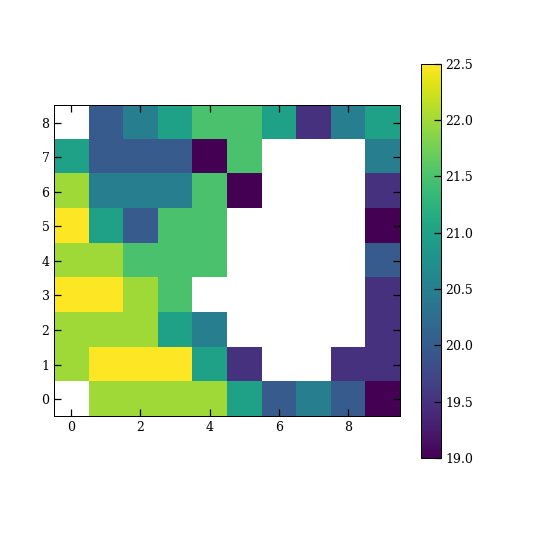

In [4]:
plt.figure()
plt.imshow(KSN[0],origin='lower')
plt.colorbar()

<IPython.core.display.Javascript object>


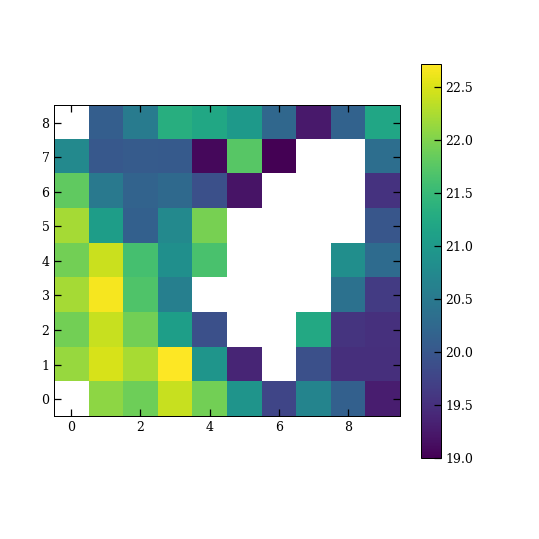

<IPython.core.display.Javascript object>


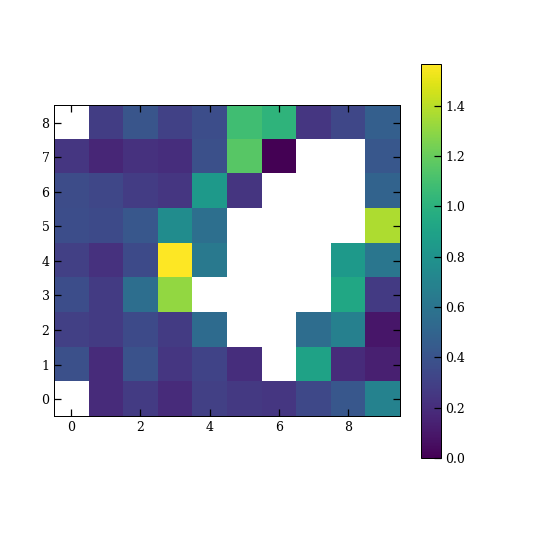

In [5]:
plt.figure()
plt.imshow(KM,origin='lower')
plt.colorbar()
plt.figure()
plt.imshow(KS,origin='lower')
plt.colorbar();

In [ ]:
plt.figure()
plt.imshow(KM-M,origin='lower')
plt.colorbar()

In [ ]:
%run '/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/K2tranpix_maglim.py'
Start = 1118
K2MagLimitDuration('/Volumes/TOSHIBA EXt/K2/c06/212200000/95000/ktwo212295159-c06_lpd-targ.fits.gz',Start)

In [ ]:
test = np.copy(data)
test[:,6,2] += K2Steptest(19,3,time,1118)
K2tranPix(testdata,time,Qual,wcs,2,6,1118)

In [ ]:
hdu = fits.open('/Volumes/TOSHIBA EXt/K2/c06/212200000/72000/ktwo212272599-c06_lpd-targ.fits.gz')
dat = hdu[1].data
data = fits.ImageHDU(hdu[1].data.field('FLUX')[:]).data#np.copy(testdata)#